In [1]:
import sys
sys.path.insert(0, 'Resources/MagicCube/code/')
import matplotlib.pyplot as plt

from cube import *
from utils import *

In [2]:
colors = ["White","Yellow","Blue","Green","Orange","Red"]

 <h1> Tests </h1>

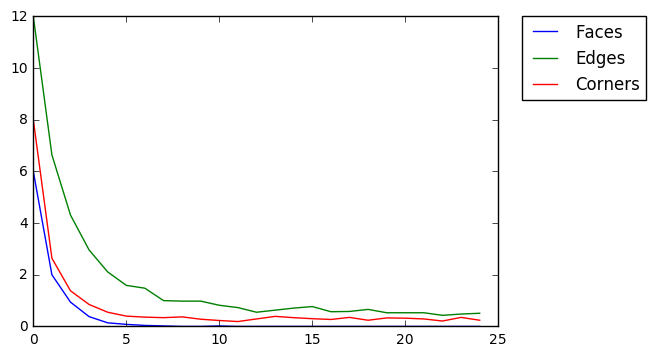

Final number of faces, should be 0:	 0.0
Final number of edges, should be 1/2:	 0.559
Final number of corners, should be 1/3:	 0.29


In [3]:
Ncubes = 100
Nmoves = 25

ncftot = np.zeros([Nmoves])
ncetot = np.zeros([Nmoves])
ncctot = np.zeros([Nmoves])

for n in range(Ncubes):
    
    c = Cube(3)
    edges = computeEdges(c)
    corners = computeCorners(c)
    
    ncf = np.empty([0])
    nce = np.empty([0])
    ncc = np.empty([0])

    for i in range(Nmoves):

        ncf = np.append(ncf,numCompleteFaces(c))
        nce = np.append(nce,numCompleteEdges(c,edges))
        ncc = np.append(ncc,numCompleteCorners(c,corners))
    #     randomMove(c,1)
        c.randomize(1)
        
    ncftot += ncf
    ncetot += nce
    ncctot += ncc
    
plt.plot(ncftot/Ncubes, 'b', label = "Faces")
plt.plot(ncetot/Ncubes, 'g', label = "Edges")
plt.plot(ncctot/Ncubes, 'r', label = "Corners")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print("Final number of faces, should be 0:\t",np.mean(ncftot[-10:]/Ncubes))
print("Final number of edges, should be 1/2:\t",np.mean(ncetot[-10:]/Ncubes))
print("Final number of corners, should be 1/3:\t",np.mean(ncctot[-10:]/Ncubes))

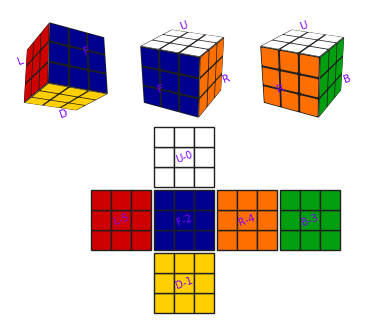

6 12 8
Now turn faces (without modifying the cube)


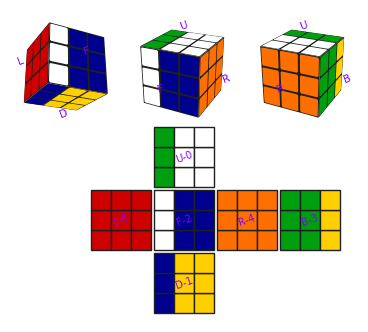

2 8 4
Going back


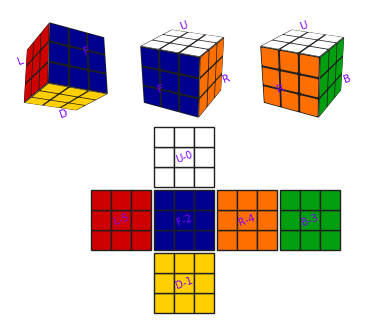

6 12 8
c.move("U",3,1) produces an error, as expected


In [4]:
c = Cube(3)
edges = computeEdges(c)
corners = computeCorners(c)
# c.render(flat=False)
# c.render(views=False)
# plt.show()
# print("Now all")
c.render()
plt.show()
print(numCompleteFaces(c),numCompleteEdges(c,edges),numCompleteCorners(c,corners))
print("Now turn faces (without modifying the cube)")
c.move("L",0,1) #moves the layer 0 (second argument), 1 time (third argument) by 90° clock-wise, parallel to face "U"
# randomMove(c,2)
# c.randomize(2)
c.render()
plt.show()
print(numCompleteFaces(c),numCompleteEdges(c,edges),numCompleteCorners(c,corners))
print("Going back") #the third argument is defined with modulo 4: for instance -1 = 3
c.move("L",0,-1, verbose = True) #moves the layer 0 (second argument), -1 time (third argument), parallel to face "U"
c.render()
plt.show()
print(numCompleteFaces(c),numCompleteEdges(c,edges),numCompleteCorners(c,corners))
print('c.move("U",3,1) produces an error, as expected')

How to turn the view point, i.e. change the name of the faces


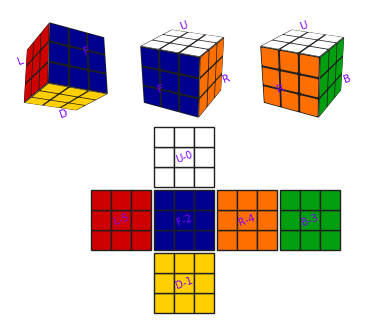

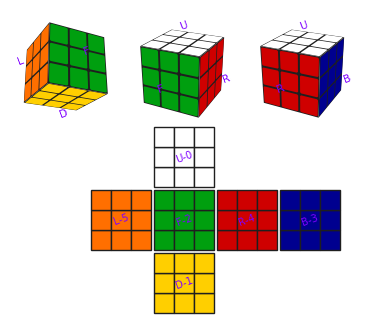

the sequence of actions is quite clear for the instruction


In [2]:
print("How to turn the view point, i.e. change the name of the faces")
c = Cube(3)
c.render()
plt.show()
c.turn("U",2)
c.render()
plt.show()
print("the sequence of actions is quite clear for the instruction")